# The Sparks Foundation Task 2

# Author : Pranay Shinde

# Task - To predict the optimum number of clusters of the given dataset and represent it visually using Unsupervised Machine Learning.

# Step - 1: Data pre-processing Step

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
#Importing the Dataset
iris = pd.read_csv('Iris.csv')
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
#Extracting Independent Variables
x = iris.iloc[:,[0,1,2,3]].values
x

array([[  1. ,   5.1,   3.5,   1.4],
       [  2. ,   4.9,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [  4. ,   4.6,   3.1,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [  6. ,   5.4,   3.9,   1.7],
       [  7. ,   4.6,   3.4,   1.4],
       [  8. ,   5. ,   3.4,   1.5],
       [  9. ,   4.4,   2.9,   1.4],
       [ 10. ,   4.9,   3.1,   1.5],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 13. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 20. ,   5.1,   3.8,   1.5],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 22. ,   5.1,   3.7,   1.5],
       [ 23. ,   4.6,   3.6,   1. ],
       [ 24. ,   5.1,   3.3,   1.7],
       [ 25. ,   4.8,   3.4,   1.9],
       [ 26. ,   5. ,   3. ,   1.6],
       [ 27. ,   5. ,   3.4,   1.6],
 

# Step - 2:Finding the optimal number of clusters using the elbow method

In [4]:
#Finding optimal numbers of clusters using the elbow method
from sklearn.cluster import KMeans

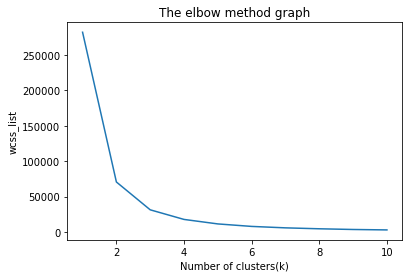

In [5]:
#initializing the list for the values of WCSS(Within cluster sum of squares)
wcss_list = []

#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
#plotting the results on a line graph
plt.plot(range(1, 11), wcss_list)
plt.title('The elbow method graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

### From the above plot,we can see that the elbow point is at 3.So we consider that the number of clusters here will be 3.

# Step - 3 :Training the K-means algorithm on the training dataset

In [6]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=3,init='k-means++',random_state = 0)
y_predict = kmeans.fit_predict(x)

# Step - 4: Visualizing the Clusters

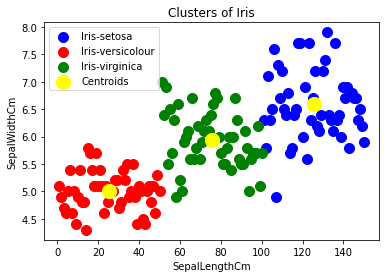

In [7]:
#Visulaising the clusters - On the first two columns. 
plt.scatter(x[y_predict == 0,0],x[y_predict == 0,1],s = 100,c = 'blue',label = 'Iris-setosa')
plt.scatter(x[y_predict == 1,0],x[y_predict == 1,1],s = 100,c = 'red',label = 'Iris-versicolour')
plt.scatter(x[y_predict == 2,0],x[y_predict == 2,1],s = 100,c = 'green',label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.title('Clusters of Iris')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 200, c = 'yellow', label = 'Centroids')
plt.legend()

